# フーリエ変換

## 理論

フーリエ変換は種々のフィルタの周波数特性を解析するために使われる．画像に対しては 2次元離散フーリエ変換 (DFT) を使って周波数領域に変換する．高速化されたアルゴリズムである 高速フーリエ変換 (FFT) はDFTの計算に使いる



## Numpyを使ったフーリエ変換

まず初めにNumpyを使ったフーリエ変換の計算方法を見ていこう．NumpyはFFTを計算するための関数 np.fft.fft2() を用意している．この関数は複素数型の配列を出力する．第1引数は入力画像をグレースケール画像として与える．第2引数は出力配列のサイズを指定するが，オプションである．指定するサイズが入力画像のサイズより大きければ入力画像はFFTの計算をする前にゼロパディングされる．入力画像のサイズより小さければ入力画像を切り取る．何も指定されなければ出力配列のサイズは入力画像のサイズと同じになる．

実際に計算をしてみると，周波数領域の原点(直流成分)が画像の左上の角に位置するようになる．直流成分を画像中心に移動させたければ，スペクトル全体を \frac{N}{2} 両方向のずらす必要がある．この移動には np.fft.fftshift() 関数を使いる(これでより解析がしやすくなる)．一度フーリエ変換を計算すれば，スペクトルの大きさが分かる 

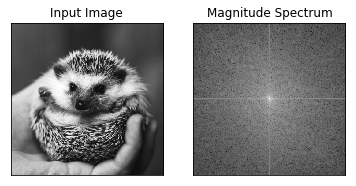

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/hari.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


中心に白い領域が集中している事が分かる．これは画像が低周波成分をより多く含んでいることを意味する．

これでフーリエ変換を見ることができた．これによりハイパスフィルタといった周波数領域での処理ができるようになる．低周波成分に対して矩形windowを使ったマスク処理をすることによって低周波成分を取り除く事ができる．それから np.fft.ifftshift() 関数を使って直流成分の位置を画像の左上に戻し、 np.ifft2() 関数を使って逆フーリエ変換を適用する．最終的な結果は複素数型の配列になるので，その絶対値をとる

In [6]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

TypeError: slice indices must be integers or None or have an __index__ method